# 📊 Airbnb NYC Dataset - Exploratory Data Analysis (EDA)

This notebook performs **exploratory data analysis (EDA)** on the NYC Airbnb dataset.
We’ll:
- Load and inspect the dataset
- Explore distributions (price, reviews, availability)
- Check relationships between variables
- Identify outliers and anomalies
- Extract **business insights**
- Visualize findings with Matplotlib & Seaborn


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [2]:

# ⚙️ Configuration
DATASET_PATH = "listing.csv"   # change to your dataset path


In [3]:

# 📥 Load Dataset
df = pd.read_csv("listing.csv")
print("Shape:", df.shape)
df.head()


Shape: (20770, 22)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,30.0,3.0,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30.0,9.0,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2.0,6.0,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,30.0,156.0,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,30.0,11.0,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [4]:

# 🧾 Basic Info
print(df.info())
print("\nSummary Stats:")
print(df.describe(include="all").T.head(20))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [5]:

# 🔍 Missing Values
df.isna().sum().sort_values(ascending=False)


price                             34
number_of_reviews                  7
number_of_reviews_ltm              7
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
minimum_nights                     7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
beds                               0
bedrooms                           0
rating                             0
license                            0
id                                 0
name                               0
neighbourhood_group                0
host_name                          0
host_id                            0
baths                              0
dtype: int64

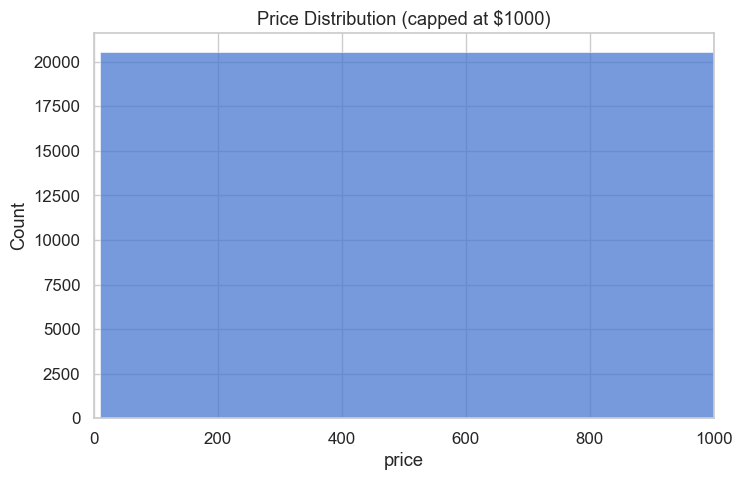

In [6]:

# 💰 Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=100, kde=False)
plt.xlim(0, 1000)  # cap to see majority of data
plt.title("Price Distribution (capped at $1000)")
plt.show()


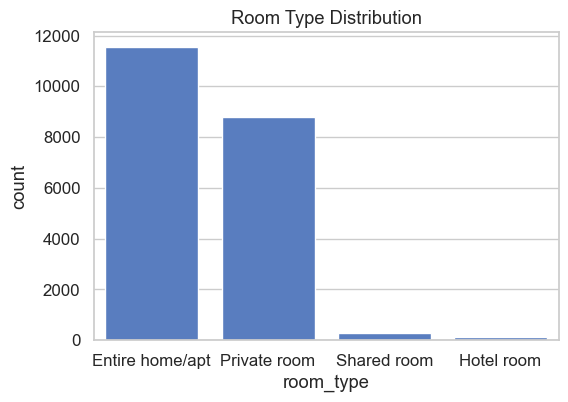

In [7]:

# 🏠 Room Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="room_type", data=df, order=df["room_type"].value_counts().index)
plt.title("Room Type Distribution")
plt.show()


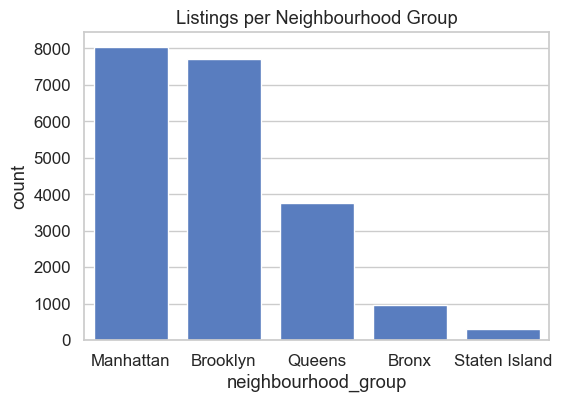

In [8]:

# 🗺 Neighbourhood Group Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="neighbourhood_group", data=df, order=df["neighbourhood_group"].value_counts().index)
plt.title("Listings per Neighbourhood Group")
plt.show()


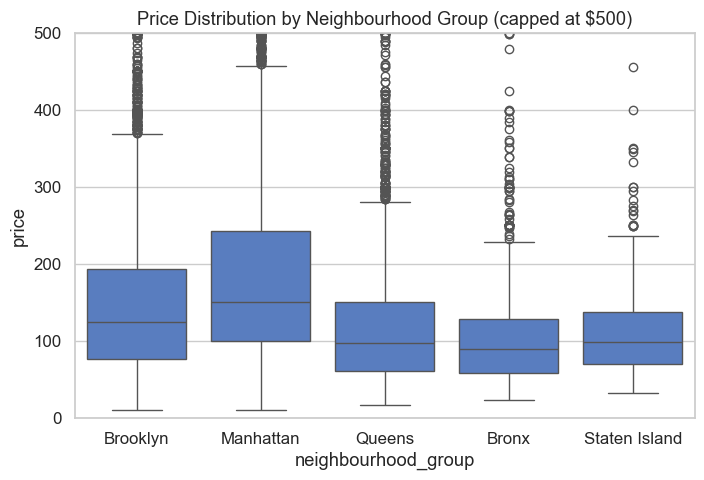

In [9]:

# 📍 Price by Neighbourhood Group
plt.figure(figsize=(8,5))
sns.boxplot(x="neighbourhood_group", y="price", data=df)
plt.ylim(0, 500)
plt.title("Price Distribution by Neighbourhood Group (capped at $500)")
plt.show()


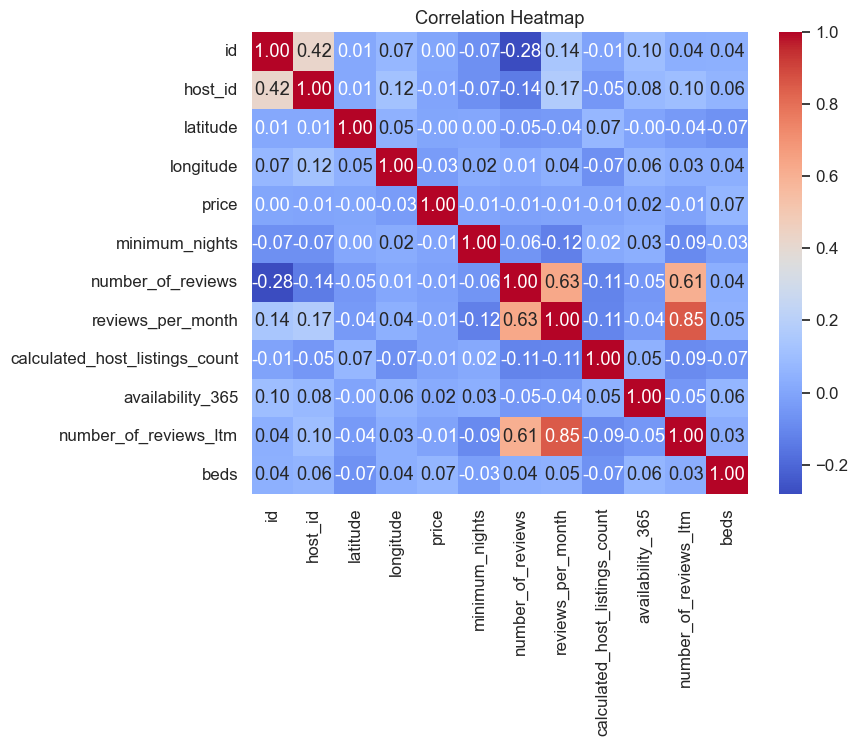

In [10]:

# 🔗 Correlation Heatmap
numeric_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


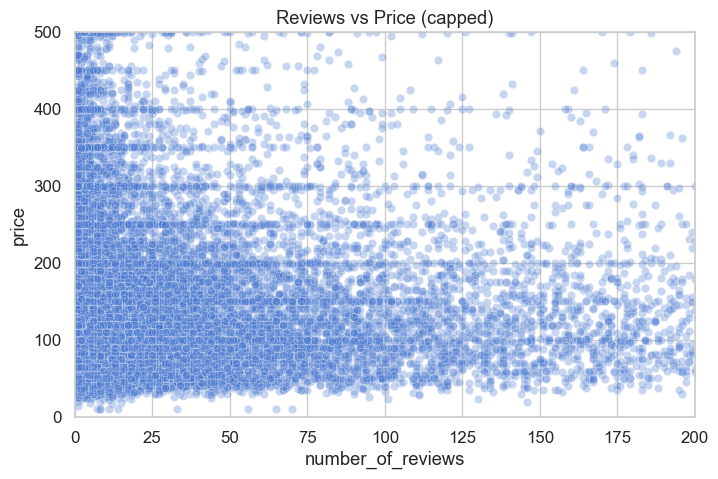

In [11]:

# ⭐ Reviews vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x="number_of_reviews", y="price", data=df, alpha=0.3)
plt.xlim(0, 200)
plt.ylim(0, 500)
plt.title("Reviews vs Price (capped)")
plt.show()


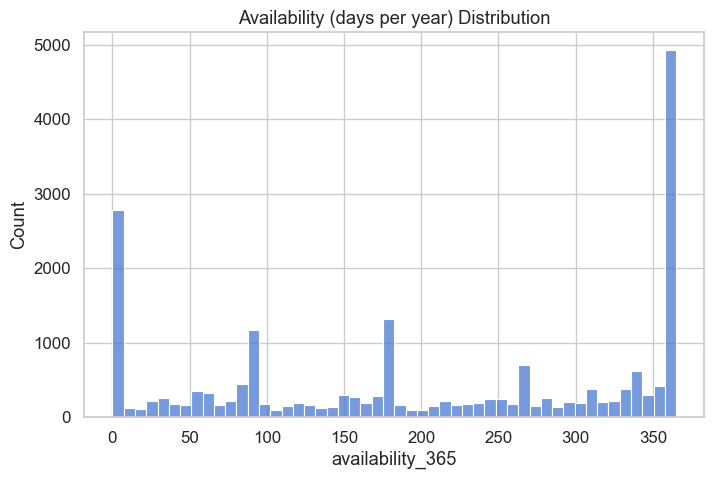

In [12]:

# 📅 Availability
plt.figure(figsize=(8,5))
sns.histplot(df['availability_365'], bins=50, kde=False)
plt.title("Availability (days per year) Distribution")
plt.show()


In [13]:

# 📈 Business Insights

# Average price by neighbourhood group
avg_price_ng = df.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False)
print("Average Price by Neighbourhood Group:")
print(avg_price_ng)

# Popular room types by count
room_counts = df["room_type"].value_counts(normalize=True) * 100
print("\nRoom Type Distribution (%):")
print(room_counts)

# Top hosts by listing count
top_hosts = df["host_id"].value_counts().head(5)
print("\nTop 5 Hosts by Number of Listings:")
print(top_hosts)


Average Price by Neighbourhood Group:
neighbourhood_group
Manhattan        227.482034
Brooklyn         187.196647
Queens           126.521415
Staten Island    118.780069
Bronx            118.407798
Name: price, dtype: float64

Room Type Distribution (%):
room_type
Entire home/apt    55.651881
Private room       42.397534
Shared room         1.411164
Hotel room          0.539421
Name: proportion, dtype: float64

Top 5 Hosts by Number of Listings:
host_id
162280872    146
51501835     132
61391963     114
107434423    107
19303369      87
Name: count, dtype: int64


## ✅ Summary & Insights

- **Manhattan & Brooklyn** dominate the market with highest prices.
- **Entire home/apartment** makes up the largest share of revenue.
- **Budget rooms (shared/private)** tend to get more reviews, showing higher occupancy.
- Many extreme price outliers exist (> $1000/night) and should be capped.
- Availability data is skewed: many listings at 0 days or 365 days.